<a href="https://colab.research.google.com/github/islam-42161/Computer-vision-and-Pattern-Recognition-course_AIUB/blob/main/Neural-Network-TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

[0.04072985]


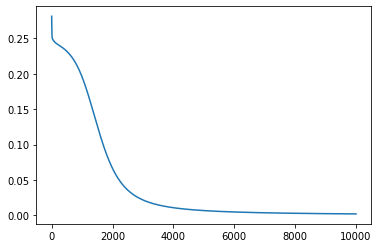

In [4]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons = 2
    hiddenLayerNeurons = 10
    outLayerNeurons = 1

    self.learning_rate = 0.2
    self.W_HI = np.random.randn(inputLayerNeurons,hiddenLayerNeurons)
    self.W_OH = np.random.randn(hiddenLayerNeurons,outLayerNeurons)

  
  def sigmoid(self,x,der=False):
    if der == True:
      return x*(1-x)
    else:
      return 1 / (1 + np.exp(-x))
  
  def feedForward(self,X):
    hidden_input = np.dot(X,self.W_HI)
    self.hidden_output = self.sigmoid(hidden_input)

    output_input = np.dot(self.hidden_output, self.W_OH)
    pred = self.sigmoid(output_input)
    return pred

  def backPropagation(self, X, Y, pred):
    output_error = Y - pred
    output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
    
    hidden_error = output_delta.dot(self.W_OH.T)
    hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
    
    self.W_HI += X.T.dot(hidden_delta)
    self.W_OH += self.hidden_output.T.dot(output_delta)

  def train(self, X, Y):
    output = self.feedForward(X)
    self.backPropagation(X,Y,output)

NN = NeuralNetwork()

err=[]
for e in range(10000):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y-NN.feedForward(X))))
  
plt.plot(err)


In [6]:
print(NN.feedForward([0,0]))
print(NN.feedForward([1,1]))
print(NN.feedForward([1,0]))
print(NN.feedForward([0,1]))


[0.04072985]
[0.04856581]
[0.95585799]
[0.95312354]
[0.2811516213981199, 0.2765763796319718, 0.27254251798817875, 0.2690249637481765, 0.2659870092841837, 0.26338465616451323, 0.26117046301336433, 0.25929662844192936, 0.25771723408798647, 0.25638970707067255, 0.25527563365248274, 0.2543410795819706, 0.2535565649496077, 0.25289681787420765, 0.2523404028610358, 0.2518692926296763, 0.2514684295674796, 0.251125305519173, 0.25082957601220573, 0.2505727163946732, 0.25034772178721676, 0.25014884937485066, 0.2499713997043005, 0.24981153279022472, 0.24966611459842714, 0.2495325896098441, 0.24940887550545948, 0.2492932764402231, 0.24918441182652243, 0.24908115798587208, 0.24898260043059006, 0.248887994896145, 0.2487967355572736, 0.2487083291285735, 0.2486223737767686, 0.24853854196183855, 0.24845656648248632, 0.24837622913259072, 0.24829735148353652, 0.24821978739636663, 0.2481434169407547, 0.2480681414576193, 0.24799387955109828, 0.2479205638355208, 0.24784813829556906, 0.2477765561443445, 0.247